### Importación de datos



In [ ]:
# Importar datos. Ojo con el raw, es importante para importar como datos utilizables.
# https://github.com/333CME/Challengue-Data-Science/blob/main/tienda_1.csv Tuve que eliminar el blob y el espacio el archivo tenía un espacio en el nombre
# El espacio en el nombre del archivo generaba y error en la url % y no podía correr el código
import pandas as pd
datos = pd.concat([pd.read_csv(f"https://raw.githubusercontent.com/333CME/Challengue-Data-Science/main/tienda_{i}.csv").assign(Tienda=f'Tienda_{i}') for i in range(1,5)])


In [ ]:
# Mostrar estructura de datos
datos.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1


In [ ]:
pip install pandas matplotlib

#1. Análisis de facturación



In [ ]:
# Calcular facturación
facturacion = datos.groupby('Tienda')['Precio'].sum()

<Axes: title={'center': 'Facturación por Tienda'}, xlabel='Tienda', ylabel='Total Pesos $'>

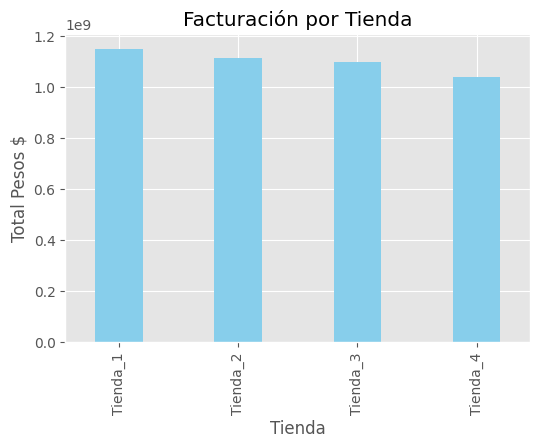

In [ ]:
# Mostrar resultados
facturacion.plot(kind='bar', title='Facturación por Tienda', ylabel='Total Pesos $', xlabel='Tienda', figsize=(6,4), width=0.4, color = 'skyblue')
# Realicé ajustes de ancho de barra y color (valor predeterminado: 0.8)


# 2. Ventas por categoría

In [ ]:
# Calcular categorías populares
categorias_populares = datos.groupby(['Tienda', 'Categoría del Producto']).size().groupby('Tienda').nlargest(3)

<Axes: title={'center': 'Top 3 Categorías por Tienda'}, xlabel='Tienda,Tienda', ylabel='Ventas'>

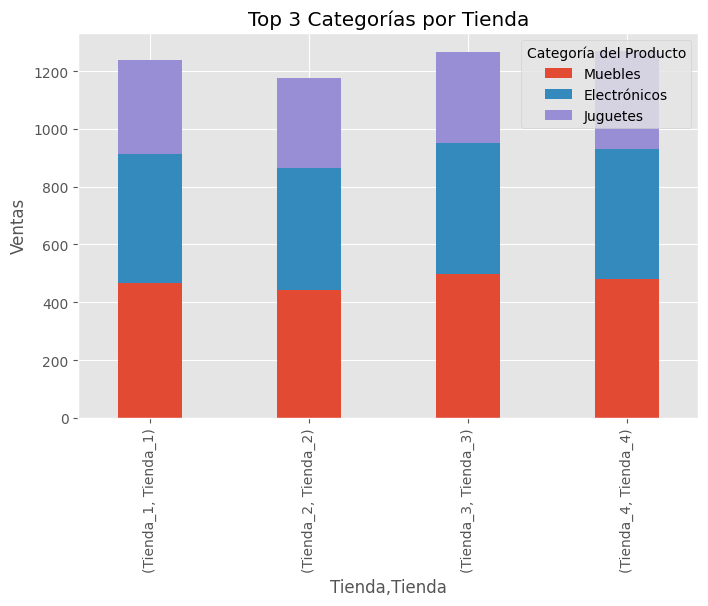

In [ ]:
# Mostrar resultados
categorias_populares.unstack().plot(kind='bar', stacked=True, title='Top 3 Categorías por Tienda', ylabel='Ventas', figsize=(8,5), width=0.4)

# 3. Calificación promedio de la tienda


In [ ]:
# Calcular promedio de evaluación
promedio_evaluacion = datos.groupby('Tienda')['Calificación'].mean()

<Axes: title={'center': 'Calificación Promedio por Tienda'}, xlabel='Tienda', ylabel='Puntuación'>

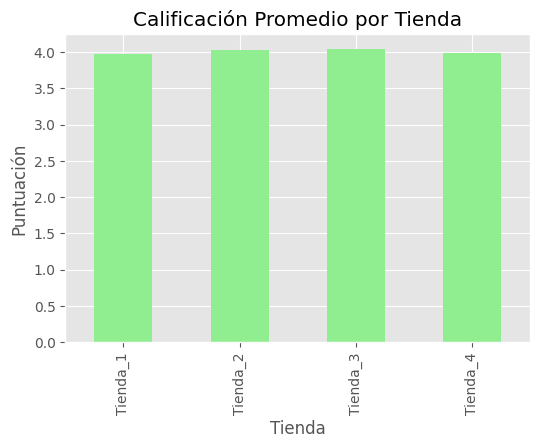

In [ ]:
# Mostrar resultados
promedio_evaluacion.plot(kind='bar', color='lightgreen', title='Calificación Promedio por Tienda', ylabel='Puntuación', figsize=(6,4))

# 4. Productos más y menos vendidos

In [ ]:
# Calcular productos más vendidos (Top 3)
top_productos = datos.groupby(['Tienda', 'Producto'])['Cantidad de cuotas'].sum().groupby('Tienda').nlargest(3)

In [ ]:
# Mostrar resultados
print("Top 3 Productos por Tienda:\n", top_productos)


Top 3 Productos por Tienda:
 Tienda    Tienda    Producto                 
Tienda_1  Tienda_1  Secadora de ropa             214
                    TV LED UHD 4K                196
                    Mesa de noche                188
Tienda_2  Tienda_2  Iniciando en programación    223
                    Iphone 15                    195
                    Guitarra acústica            183
Tienda_3  Tienda_3  Bicicleta                    191
                    Estufa                       182
                    Juego de mesa                181
Tienda_4  Tienda_4  Dashboards con Power BI      196
                    Cama box                     195
                    Cubertería                   183
Name: Cantidad de cuotas, dtype: int64


# 5. Envío promedio por tienda

In [ ]:
# Calcular costo de envío promedio
costo_envio = datos.groupby('Tienda')['Costo de envío'].mean()

<Axes: title={'center': 'Costo Promedio de Envío'}, xlabel='Tienda', ylabel='Costo $'>

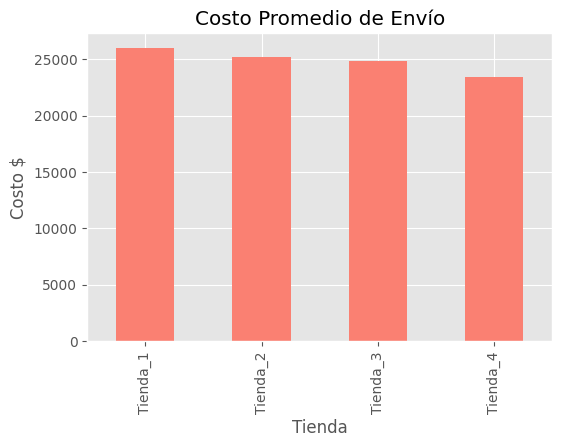

In [ ]:
# Línea 2: Mostrar resultados
costo_envio.plot(kind='bar', color='salmon', title='Costo Promedio de Envío', ylabel='Costo $', figsize=(6,4))